Import packages.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [3]:
X, y, _, names, _ = read_design_space('./final_result_impl_histogram.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

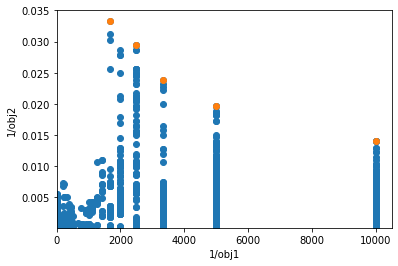

In [4]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


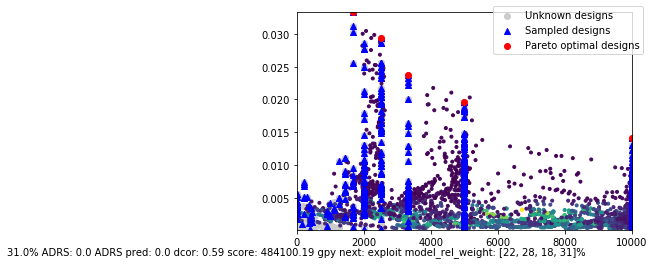

In [5]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.31),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [6]:
sherlock.known_idx

array([1336, 1354, 1324, 1655, 1421, 2921, 2923, 2696, 2699, 2561, 2516,
       2471, 2472, 1753, 1094, 1097,    2,    0,   72,    1,  374,   19,
        399, 2697,    3,  369,   96,  186,   97,  187,  100,   98,  188,
         33,   84,    4,  300,  282,  373, 2531,  279,  280,    5,  302,
         99,  189,    6,  281,  190, 2523,  191,  929, 2660,  101, 1754,
       2621, 2477, 1092,   48,  283,  380,  284,   93,  372,  552,  375,
       2479, 1751,  732, 2482,  912,  553,  192,  733,   30,  915, 2476,
        913, 1759, 2950, 1591, 1756,    7,  555, 2521,  554, 2571, 2702,
        734,  914,  376,  735, 2524,  377,  193,  881,  556,    8,  916,
       2963, 1939,  194,  557,  203,  106, 2525,  736,  202,  201, 2519,
        105,   23,  291,   18, 2520,  294,    9,   12,  102,  195,  285,
        196,  103,   14, 2474, 2473,   10, 2948,  303, 1892,  513, 1895,
        198, 1931,   24,  933,  286, 1901, 1928, 2960,  381,  197, 1916,
         15,   11,   21,  104,  287,  561,   35,  2